#LSA model applied on all the podcasts
#document similarity marix developed based on the lsa components

In [2]:
import shutil
import os
#shutil.copytree('C:\\Users\\Harini\\Downloads\\Podknow-master\\data\\transcripts\\gcsst\\raw','C:\\Users\\Harini\\Final_Transcripts' )

In [ ]:
os.getcwd()


#using nltk to remove stop words  and form a excel sheet.

In [3]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

In [4]:
results = []
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import pandas as pd
for folderName,subfolders,fileName in os.walk('C:\\Users\\Harini\\Final_Transcripts'):
       for file in fileName:
            if  file.endswith(".txt"):
                scrubbed = []
                # file in the format of ID_Name_Date_TopicName.txt
                value0, value1, value2,value3,*extraWords = file.split('_')
                file = open(os.path.join(folderName,file),'rt')
                text = file.read() 
                value4 = text
                rows = (value0,value1,value2,value3,value4)
                results.append(rows)            

labels = ['ID','Name','Date','topicName','scrubbedtext']
PodKnow_Data = pd.DataFrame.from_records(results, columns= labels)
print(PodKnow_Data)
PodKnow_Data.to_csv(r'PodKnow_Data.csv')

             ID                                               Name  \
0    1012570406                                    TheMFCEOProject   
1    1028908750                                        HiddenBrain   
2    1039708229                                      BrownAmbition   
3    1042368254                            TheHerdwithColinCowherd   
4    1043699613  Saints-Rams, Succession's Brilliance, Team USA...   
5    1044196249                                   MyDadWroteAPorno   
6    1047335260                                  TheBenShapiroShow   
7    1051557000                                          ScienceVs   
8    1057255460                              TheNPRPoliticsPodcast   
9    1062418176                                    TRUECRIMEGARAGE   
10   1068563276                  GettingCuriouswithJonathanVanNess   
11   1070322219                                       JockoPodcast   
12   1081124929                                 TheVanishedPodcast   
13   1087110764     

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
pd.set_option("display.max_colwidth", 200)

In [6]:
# removing everything except alphabets`
PodKnow_Data['clean_doc'] = PodKnow_Data['scrubbedtext'].str.replace("[^a-zA-Z#]", " ")
# removing short words
PodKnow_Data['clean_doc'] = PodKnow_Data['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
PodKnow_Data['clean_doc'] = PodKnow_Data['clean_doc'].apply(lambda x: x.lower())

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = PodKnow_Data['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(PodKnow_Data)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

PodKnow_Data['clean_doc'] = detokenized_doc

In [ ]:
X = PodKnow_Data['clean_doc'].tolist()

In [8]:
tokenized_doc[0]

['stack',
 'hundreds',
 'roof',
 'stop',
 'reach',
 'family',
 'food',
 'anybody',
 'guys',
 'listen',
 'mfceo',
 'project',
 'andy',
 'host',
 'motherfuking',
 'guys',
 'always',
 'always',
 'always',
 'join',
 'amazing',
 'handsome',
 'buff',
 'podcast',
 'host',
 'guys',
 'million',
 'nicknames',
 'nicknames',
 'always',
 'nicknames',
 'dude',
 'dude',
 'hard',
 'leon',
 'going',
 'believe',
 'well',
 'going',
 'actually',
 'really',
 'well',
 'thing',
 'hard',
 'either',
 'going',
 'little',
 'questions',
 'drive',
 'crazy',
 'like',
 'actually',
 'question',
 'asking',
 'know',
 'moderate',
 'response',
 'good',
 'keeping',
 'keeping',
 'diet',
 'right',
 'problem',
 'manifest',
 'dress',
 'lose',
 'appetite',
 'enough',
 'yeah',
 'disqualified',
 'yeah',
 'listen',
 'know',
 'saying',
 'like',
 'heart',
 'called',
 'hardgainer',
 'yeah',
 'naturally',
 'thin',
 'trouble',
 'putting',
 'muscle',
 'takes',
 'even',
 'distance',
 'people',
 'understand',
 'like',
 'everybody',
 'alw

In [9]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [11]:
dictionary,doc_term_matrix = prepare_corpus(tokenized_doc)

In [12]:
doc_term_matrix

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 2),
  (6, 1),
  (7, 12),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 9),
  (23, 4),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 4),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 5),
  (37, 4),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 2),
  (42, 6),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 4),
  (56, 1),
  (57, 8),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 3),
  (62, 9),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 2),
  (68, 6),
  (69, 2),
  (70, 7),
  (71, 1),
  (72, 2),
  (73, 3),
  (74, 2),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 6),
  (88, 1),
  (89, 1),
  (90, 14),
  (91, 

In [10]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [13]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics,chunksize=500, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [14]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [15]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(tokenized_doc)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [55]:
tokenized_doc

0      [stack, hundreds, roof, stop, reach, family, food, anybody, guys, listen, mfceo, project, andy, host, motherfuking, guys, always, always, always, join, amazing, handsome, buff, podcast, host, guys...
1      [hidden, brain, shankar, vedantam, begin, today, known, miser, soul, moved, plight, others, become, synonymous, greed, selfishness, name, ebenezer, scrooge, scrooge, course, character, charles, di...
2      [qween, season, right, know, like, throw, things, ityou, know, feel, like, like, rock, salt, lowery, know, sometimes, know, something, going, good, running, like, birthday, party, birthday, party,...
3      [said, starbucks, nitro, cold, copy, music, workouts, road, trips, grand, romantic, gesture, sound, good, true, guess, starbucks, nitro, cold, brew, called, copy, subtly, sweet, lush, velvety, smo...
4      [today, special, episode, thursday, rolling, ringer, podcast, network, bread, ziprecruiter, hiring, challenge, cold, founder, gretchen, heebner, discovered, needed, 

In [60]:
model=create_gensim_lsa_model(tokenized_doc,160,10)

[(0, '0.756*"like" + 0.319*"know" + 0.162*"going" + 0.160*"think" + 0.156*"people" + 0.131*"right" + 0.126*"yeah" + 0.126*"really" + 0.100*"want" + 0.099*"would"'), (1, '-0.578*"like" + 0.269*"people" + 0.216*"going" + 0.198*"know" + 0.182*"right" + 0.150*"would" + 0.128*"time" + 0.127*"said" + 0.116*"think" + -0.116*"yeah"'), (2, '-0.706*"fucking" + -0.229*"know" + -0.203*"yeah" + 0.179*"japanese" + -0.178*"shit" + 0.163*"people" + -0.153*"right" + -0.144*"fuck" + 0.140*"like" + 0.098*"world"'), (3, '-0.484*"know" + 0.417*"fucking" + 0.362*"japanese" + -0.220*"yeah" + 0.184*"like" + 0.152*"going" + 0.115*"quote" + 0.102*"japan" + 0.101*"united" + 0.098*"states"'), (4, '0.705*"yeah" + 0.259*"japanese" + -0.226*"going" + 0.152*"people" + 0.123*"gonna" + 0.108*"disease" + 0.099*"know" + -0.096*"think" + 0.091*"lyme" + 0.083*"well"'), (5, '-0.469*"know" + 0.408*"disease" + 0.326*"lyme" + -0.199*"japanese" + 0.192*"think" + 0.169*"really" + 0.150*"yeah" + 0.146*"tick" + 0.130*"also" + 0.10

In [16]:
import gensim


from gensim.test.utils import common_corpus, common_dictionary
from gensim.sklearn_api import TfIdfTransformer

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(tokenized_doc)

n_items = len(dictionary)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

In [ ]:
start,stop,step=2,150,10
plot_graph(tokenized_doc,start,stop,step)

In [ ]:
start,stop,step=150,250,10
plot_graph(tokenized_doc,start,stop,step)

In [17]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=160)

In [18]:
lsi_model.show_topics(num_topics=10)

[(0,
  '0.756*"like" + 0.319*"know" + 0.162*"going" + 0.160*"think" + 0.156*"people" + 0.131*"right" + 0.126*"yeah" + 0.126*"really" + 0.100*"want" + 0.099*"would"'),
 (1,
  '-0.578*"like" + 0.269*"people" + 0.216*"going" + 0.198*"know" + 0.182*"right" + 0.150*"would" + 0.128*"time" + 0.127*"said" + 0.116*"think" + -0.116*"yeah"'),
 (2,
  '-0.706*"fucking" + -0.229*"know" + -0.203*"yeah" + 0.179*"japanese" + -0.178*"shit" + 0.163*"people" + -0.153*"right" + -0.144*"fuck" + 0.140*"like" + 0.098*"world"'),
 (3,
  '-0.484*"know" + 0.417*"fucking" + 0.362*"japanese" + -0.220*"yeah" + 0.184*"like" + 0.152*"going" + 0.115*"quote" + 0.102*"japan" + 0.101*"united" + 0.098*"states"'),
 (4,
  '-0.705*"yeah" + -0.259*"japanese" + 0.226*"going" + -0.152*"people" + -0.123*"gonna" + -0.108*"disease" + -0.099*"know" + 0.096*"think" + -0.091*"lyme" + -0.083*"well"'),
 (5,
  '0.469*"know" + -0.408*"disease" + -0.326*"lyme" + 0.199*"japanese" + -0.192*"think" + -0.169*"really" + -0.150*"yeah" + -0.146*"

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# our corpus
#vectorizer = TfidfTransformer()
vectorizer = CountVectorizer(min_df = 5, stop_words = 'english')
dtm = vectorizer.fit_transform(PodKnow_Data['clean_doc'])
pd.DataFrame(dtm.toarray(),index=PodKnow_Data['topicName'],columns=vectorizer.get_feature_names())

aaron  \
topicName                                                                                                                                      
OvercomingTheFearsThatKeepUsOrdinarywithAndyFrisellaMFCEO314.txt                                                                           0   
WereAllGonnaDie.txt                                                                                                                        1   
Ep189TiffanysGoalforTheBig40.txt                                                                                                           0   
Blazing5Week2.txt                                                                                                                          1   
The Bill Simmons Podcast.txt                                                                                                               0   
FootnotesInMemoriam.txt                                                                                                                    0   
Ep860TheFirstREALFightNightWarrensBlownOpportunity.txt                                                                                     0   
TheDinosaurExplosion.txt                                                                                                                   0   
The3rdDemocraticDebateTakeaways.txt                                                                                                        0   
BrandonSwansonPart3334.txt                                                                                                                 0   
HowManyCatsAmIAllowedToFosterBeforeItsIllegalwithHannahShaw.txt                                                                            0   
194CostlyPitfallstoAvoidandCriticalManeuversHowtoWininAmericanBusinessWithPeteRoberts.txt                                                  0   
JohnBrewer.txt                                                                                                                             0   
Episode136ABoyAndHisDog.txt                                                                                                                0   
205LivingonOvertimeDavidCFajgenbaum.txt                                                                                                    0   
RobGronkowski.txt                                                                                                                          0   
IntroducingUncoverTheCatLadyCase.txt                                                                                                       6   
EndOfSummerUpdate.txt                                                                                                                      0   
FromhotdogcarttohospitalityempireHowDannyMeyerfounderofUnionSquareHospitalityGroupbecamethegreatestrestaurateurNYChaseverseen.mp3.txt      0   
ATaleOfTwoSchoolDistricts.txt                                                                                                              0   
TheQueenofCuba.txt                                                                                                                         0   
E163TheSaintValentinesDayMassacre.txt                                                                                                      0   
LoveBabs.txt                                                                                                                               0   
IntroducingMonsterPresentsInsomniac.txt                                                                                                    0   
S2DonorEpisodePreview.txt                                                                                                                  0   
WeeksBestJeffFisherErnestineSclafaniBaylessOBJDakPrescott.txt                                                                              2   
SYSKChoiceGreatLifeHacksTheNastyPoliticalDiscussionFix.txt                                             

In [40]:
len(vectorizer.get_feature_names())

7990

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

In [43]:
lsa = TruncatedSVD(160, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [44]:
pd.DataFrame(lsa.components_,columns =vectorizer.get_feature_names())

aaron   abandon  abandoned      abby  abilities   ability      able  \
0    0.000420  0.000123   0.000845  0.000208   0.000336  0.002420  0.016245   
1    0.001483  0.000418   0.002041 -0.000441   0.001902  0.008842  0.032288   
2   -0.000447 -0.000025  -0.000398 -0.000237  -0.001718 -0.009126 -0.022521   
3   -0.001312 -0.000423  -0.003381  0.000233   0.000078  0.004140 -0.028727   
4   -0.000799  0.000047   0.002390 -0.000276   0.000650  0.002444 -0.028451   
5    0.005452  0.000765  -0.005345 -0.000009   0.000520  0.000387  0.023007   
6    0.000791  0.001657   0.004398  0.000484  -0.003874 -0.005722 -0.007557   
7    0.005903  0.000495   0.001458  0.000496  -0.001485 -0.007364  0.035349   
8    0.005544  0.000066   0.002214  0.000019  -0.001680 -0.004450  0.001608   
9    0.004077 -0.000980   0.004783 -0.000475  -0.002621 -0.007720 -0.020674   
10  -0.003153 -0.001490  -0.001753 -0.001239   0.005236  0.014278  0.010784   
11  -0.001830 -0.001364  -0.006368  0.001064  -0.001471 -0.004135 -0.035313   
12   0.003551  0.000263  -0.005275 -0.000575  -0.001765 -0.000881 -0.036509   
13   0.005110 -0.000224  -0.002739 -0.000003   0.000329  0.003204 -0.035201   
14   0.001817  0.001209   0.014184  0.000684   0.002309  0.003922  0.018786   
15   0.002327 -0.001604  -0.001896  0.000145   0.001765 -0.000457  0.004496   
16  -0.000504  0.000336   0.012245  0.001446  -0.001089  0.006396 -0.060263   
17   0.001050 -0.000169   0.010012  0.001090   0.002141  0.017978  0.045591   
18  -0.003561 -0.001396  -0.005117 -0.001000   0.001028  0.005715  0.016747   
19  -0.001487 -0.000341  -0.009650 -0.000293   0.002138  0.003421 -0.047963   
20   0.000681  0.000334  -0.004990 -0.001169  -0.004720  0.002802  0.061410   
21  -0.001818 -0.002663   0.005867 -0.000299  -0.005817 -0.004368  0.002172   
22   0.000667  0.000720  -0.003574  0.001980   0.005448  0.018460  0.033890   
23   0.001342  0.000924  -0.003121 -0.000333   0.006207  0.009089 -0.025914   
24  -0.005720 -0.001065   0.002326 -0.002547   0.000665 -0.005397  0.095511   
25  -0.004243 -0.001536  -0.001021  0.001707   0.000949 -0.008809  0.025343   
26  -0.000232 -0.000204  -0.010114  0.000413   0.005541  0.011825  0.020156   
27  -0.003708  0.003601   0.008734 -0.001098  -0.009265 -0.005169 -0.008248   
28   0.006206 -0.003075   0.009373 -0.000439   0.002635 -0.001798  0.004100   
29  -0.003487 -0.000606   0.005796 -0.001931  -0.013161  0.010553  0.035911   
..        ...       ...        ...       ...        ...       ...       ...   
130  0.004230 -0.000857   0.003698 -0.003623  -0.002206 -0.006792 -0.031130   
131 -0.000307 -0.004603  -0.019188  0.000243  -0.001662 -0.008507 -0.014119   
132 -0.016051 -0.002268   0.002335  0.008786  -0.003186 -0.001605 -0.018655   
133  0.007633 -0.003472   0.006630  0.003130  -0.001071  0.009178  0.002361   
134 -0.006810  0.001882   0.009249  0.002276  -0.006805  0.002480  0.010582   
135 -0.000655  0.000821   0.010415  0.006172   0.000626  0.027243  0.040889   
136 -0.005722 -0.003129   0.005992  0.008706   0.002690 -0.007483 -0.007344   
137  0.005228 -0.002606  -0.007512 -0.007664   0.000716 -0.021540 -0.050829   
138 -0.016101 -0.002972  -0.004415  0.005148   0.001716 -0.004145  0.000045   
139  0.005497  0.003741  -0.001133  0.002954  -0.000176 -0.016439 -0.029558   
140  0.001300 -0.000830  -0.003464 -0.002183  -0.000122 -0.006382  0.010939   
141 -0.002039 -0.000984   0.000461 -0.001281  -0.002644 -0.011146 -0.043780   
142 -0.008288  0.004804   0.015125 -0.003704  -0.000435  0.004932 -0.012153   
143  0.000670 -0.002343   0.005708  0.001878   0.002777 -0.009889  0.022981   
144  0.000425  0.001825  -0.007301 -0.006965  -0.000703 -0.019865  0.007319   
145 -0.016937 -0.001343  -0.005611  0.003908  -0.006532 -0.007739  0.011123   
146  0.010981  0.002094   0.006343  0.002007  -0.001199  0.013323 -0.007514   
147 -0.027731 -0.002672  -0.013691 -0.004922   0.002076 -0.007048  0.000758   
148  0.007226  0.003374   0.003170  0.006949  -0.004380  0

In [36]:
pd.DataFrame(dtm_lsa,index = PodKnow_Data['clean_doc'])

0         1         2         3         4         5         6    \
0    0.902604  0.137121  0.126926 -0.041798 -0.003443 -0.067764 -0.060856   
1    0.492752  0.291760 -0.147046  0.005268 -0.032614  0.132606 -0.020754   
2    0.922412 -0.138980 -0.053570 -0.019151 -0.047618 -0.087960  0.020684   
3    0.490087  0.290597  0.018505 -0.065743 -0.158489  0.196701  0.075505   
4    0.873265  0.077172 -0.033108  0.022556 -0.136871  0.160198  0.026410   
5    0.810783  0.325358 -0.023458 -0.064316 -0.101277 -0.001909  0.168165   
6    0.608973  0.352751 -0.068046  0.046246 -0.103813  0.137486  0.082306   
7    0.821007  0.275366 -0.117585 -0.058275 -0.032168 -0.024267 -0.087878   
8    0.549967  0.339686 -0.093255 -0.022609 -0.104890  0.129655  0.060805   
9    0.563035  0.360775  0.008152 -0.116373  0.024767  0.109378  0.051816   
10   0.924931 -0.161013 -0.103963  0.039175 -0.090097 -0.033435 -0.045038   
11   0.928036  0.133376  0.037716 -0.181705  0.062476 -0.147976  0.018831   
12   0.543499  0.349423 -0.042146 -0.105107 -0.113260 -0.004665  0.206648   
13   0.319553  0.263345  0.008253 -0.031747 -0.040183 -0.030105  0.131323   
14   0.707812  0.428331 -0.068935 -0.184387 -0.124809  0.137925 -0.096798   
15   0.951176 -0.046989  0.029916 -0.022683 -0.015686  0.005103  0.107476   
16   0.732058  0.164474 -0.021534 -0.106588 -0.043326 -0.062597  0.149542   
17   0.417884  0.399057 -0.044437 -0.093973 -0.005242 -0.048537  0.072224   
18   0.577403  0.544157 -0.078814 -0.080871 -0.103704  0.127324 -0.070296   
19   0.406494  0.232820 -0.085994 -0.013983 -0.007403  0.081667  0.050703   
20   0.482866  0.420117 -0.068005 -0.013804 -0.035067  0.111769  0.168638   
21   0.326914  0.287370 -0.065228  0.018554 -0.038987  0.078368  0.182329   
22   0.682551  0.355927 -0.037563 -0.153257  0.000045 -0.045800  0.072938   
23   0.396317  0.346738 -0.109241  0.018226 -0.133850  0.191263  0.232613   
24   0.647628  0.179152 -0.055200  0.087214 -0.142048  0.175705  0.047664   
25   0.642341  0.370384  0.072373 -0.107879 -0.110953  0.046711  0.214693   
26   0.671725  0.452700 -0.115275 -0.125649  0.022094 -0.007728 -0.184608   
27   0.941366 -0.136066 -0.121769  0.036430 -0.054114 -0.029699 -0.055481   
28   0.638028  0.287845  0.151028 -0.407070  0.049364 -0.407837  0.001592   
29   0.821598  0.142842 -0.092007 -0.060732 -0.101548  0.083280 -0.093131   
..        ...       ...       ...       ...       ...       ...       ...   
163  0.392154  0.347596 -0.124338 -0.057903 -0.014824  0.099887 -0.084763   
164  0.628655  0.104781 -0.120827  0.050453 -0.063478  0.051572  0.089321   
165  0.847925  0.120466 -0.008035 -0.036038 -0.108132  0.036421  0.025604   
166  0.586135  0.360233  0.004087 -0.016576 -0.143928  0.101220  0.123377   
167  0.871571  0.152664  0.086810  0.042100 -0.082993  0.029907  0.004275   
168  0.699965  0.294567  0.575490  0.268924 -0.103054 -0.014070 -0.069217   
169  0.934059  0.129856  0.072614 -0.058034  0.086518  0.039497  0.050304   
170  0.713241  0.361071 -0.133353 -0.017034 -0.007162  0.067014 -0.056380   
171  0.824791  0.277000 -0.095949 -0.036031 -0.073761  0.040527 -0.031248   
172  0.610387  0.406583  0.018636 -0.149161 -0.015455 -0.053130 -0.055763   
173  0.944068  0.045259  0.091000 -0.137271  0.105061 -0.010260  0.004483   
174  0.902482  0.128042  0.075714 -0.009333 -0.014808  0.030779  0.093302   
175  0.935043 -0.058300 -0.066222 -0.011523 -0.033977  0.005645 -0.042301   
176  0.535266  0.484123 -0.158055 -0.043260  0.026764  0.120026 -0.164243   
177  0.459518  0.413525 -0.027341 -0.075726 -0.076292  0.089141  0.105968   
178  0.853530  0.213982 -0.027612 -0.112306  0.016841 -0.110076 -0.092266   
179  0.302338  0.325318 -0.080432 -0.007002 -0.032899  0.114981  0.171758   
180  0.642914  0.431734 -0.078227 -0.103872 -0.051803  0.044141  0.112974   
181  0.856299 -0.122119  0.062902 -0.124728  0.195018  0.146847  0.118305   
182  0.425073  0.257208 -0.071277  0.003732 -0.025541  0.104299  0.153542   
183  0

In [53]:
len(dtm_lsa[0])

160

In [37]:
import sklearn
# Import all of the scikit learn stuff
#from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings

In [65]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=PodKnow_Data['topicName'],columns=PodKnow_Data['topicName'])

topicName                                                                                                                              OvercomingTheFearsThatKeepUsOrdinarywithAndyFrisellaMFCEO314.txt  \
topicName                                                                                                                                                                                                 
OvercomingTheFearsThatKeepUsOrdinarywithAndyFrisellaMFCEO314.txt                                                                                                                               1.000000   
WereAllGonnaDie.txt                                                                                                                                                                            0.467452   
Ep189TiffanysGoalforTheBig40.txt                                                                                                                                                               0.818679   
Blazing5Week2.txt                                                                                                                                                                              0.452494   
The Bill Simmons Podcast.txt                                                                                                                                                                   0.764024   
FootnotesInMemoriam.txt                                                                                                                                                                        0.743630   
Ep860TheFirstREALFightNightWarrensBlownOpportunity.txt                                                                                                                                         0.570580   
TheDinosaurExplosion.txt                                                                                                                                                                       0.739501   
The3rdDemocraticDebateTakeaways.txt                                                                                                                                                            0.507855   
BrandonSwansonPart3334.txt                                                                                                                                                                     0.542692   
HowManyCatsAmIAllowedToFosterBeforeItsIllegalwithHannahShaw.txt                                                                                                                                0.805157   
194CostlyPitfallstoAvoidandCriticalManeuversHowtoWininAmericanBusinessWithPeteRoberts.txt                                                                                                      0.875200   
JohnBrewer.txt                                                                                                                                                                                 0.516939   
Episode136ABoyAndHisDog.txt                                                                                                                                                                    0.292144   
205LivingonOvertimeDavidCFajgenbaum.txt                                                                                                                                                        0.672284   
RobGronkowski.txt                                                                                                                                                                              0.843326   
IntroducingUncoverTheCatLadyCase.txt                                                                                                                                                           0.692202   
EndOfSummerUpdate.txt                                                                                                                          

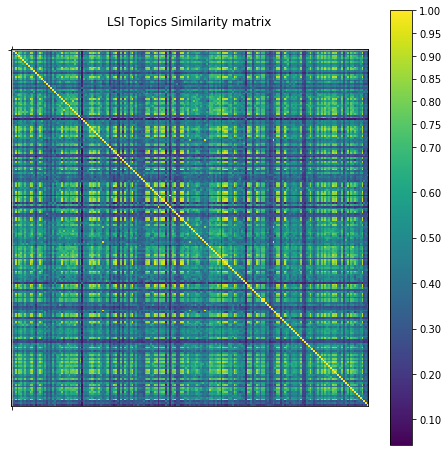

In [50]:
import matplotlib.pyplot as plt
 
labels = []

fig, ax = plt.subplots(figsize=(8,8))
cax = ax.matshow(similarity, interpolation='nearest')
ax.grid(True)
plt.title('LSI Topics Similarity matrix')
plt.xticks(range(1), labels, rotation=90);
plt.yticks(range(1), labels);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
#yellow signifies the highest similarity the diagonal is the similarity of the podcasts with itself.
#yellows other than the diagonal is the diagonl shows the similrity between the documents.